# Computing correlations

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

In [3]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2017.csv')
df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,WAC,Month,Year,TRx,Date,Pct_change,changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,2,2017,144,2017_02,0.000000,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,3,2017,152,2017_03,0.000000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,4,2017,145,2017_04,0.000000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,313.0,5,2017,176,2017_05,0.000000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,6,2017,197,2017_06,0.079872,1
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,7,2017,161,2017_07,0.000000,0
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,8,2017,176,2017_08,0.000000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,9,2017,190,2017_09,0.000000,0
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,10,2017,175,2017_10,0.000000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,338.0,11,2017,258,2017_11,0.000000,0


### Trx Correlation

Doing it per Major class

In [24]:
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2017_01,NaN,NaN,NaN,NaN,8206.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017_02,2292.0,1.0,1220940.0,12077.0,93333.0,24940.0,11817.0,299291.0,1286.0,85157.0,...,5966578.0,409105.0,NaN,5208.0,3721.0,1419965.0,425295.0,710631.0,31035.0,504.0
2017_03,2648.0,1.0,1394112.0,13748.0,106532.0,28970.0,13740.0,330579.0,1474.0,98205.0,...,6800243.0,466228.0,NaN,6010.0,4144.0,1612028.0,486978.0,468337.0,36950.0,543.0
2017_04,2377.0,2.0,1271591.0,12158.0,100087.0,26379.0,12444.0,304807.0,1412.0,89644.0,...,6173736.0,421250.0,NaN,5333.0,3883.0,1489867.0,455213.0,370196.0,32826.0,511.0
2017_05,2698.0,1.0,1329075.0,13902.0,108054.0,28666.0,13132.0,324831.0,1443.0,97128.0,...,6619831.0,453607.0,NaN,5951.0,4354.0,1579776.0,494600.0,431274.0,41776.0,491.0


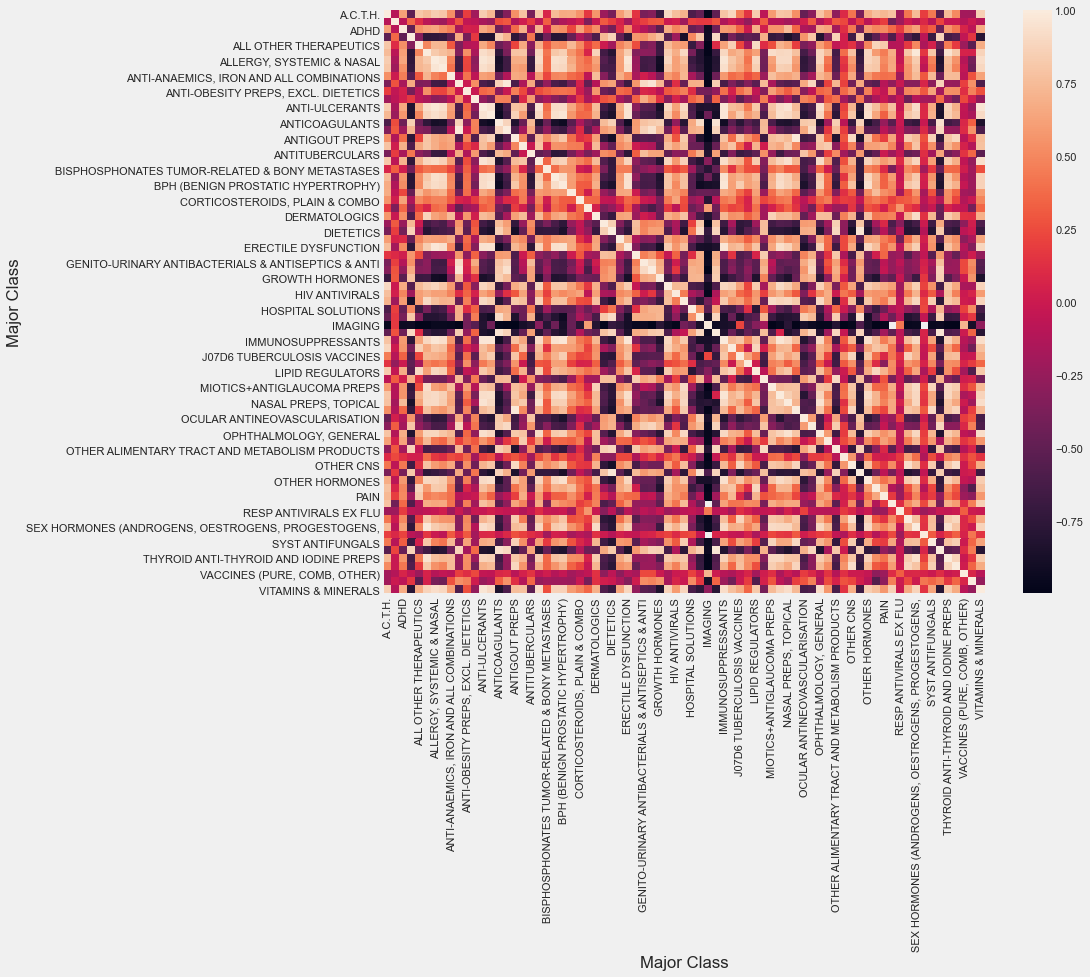

In [35]:
sns.heatmap(trx.corr(), annot=False)
plt.savefig('TRx_correlations_Major_class.jpg', bbox_inches='tight', pad_inches=2)
plt.show()

### Price Changes Correlation

Doing it per Major class

In [37]:
changed = df.groupby(['Major Class', 'Date']).changed.sum().unstack().transpose().copy()
changed.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2017_01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017_02,1.0,0.0,32.0,0.0,13.0,0.0,1.0,23.0,1.0,0.0,...,60.0,33.0,NaN,11.0,7.0,8.0,26.0,5.0,10.0,0.0
2017_03,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,1.0,3.0
2017_04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017_05,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,NaN,0.0,0.0,0.0,0.0,24.0,0.0,0.0


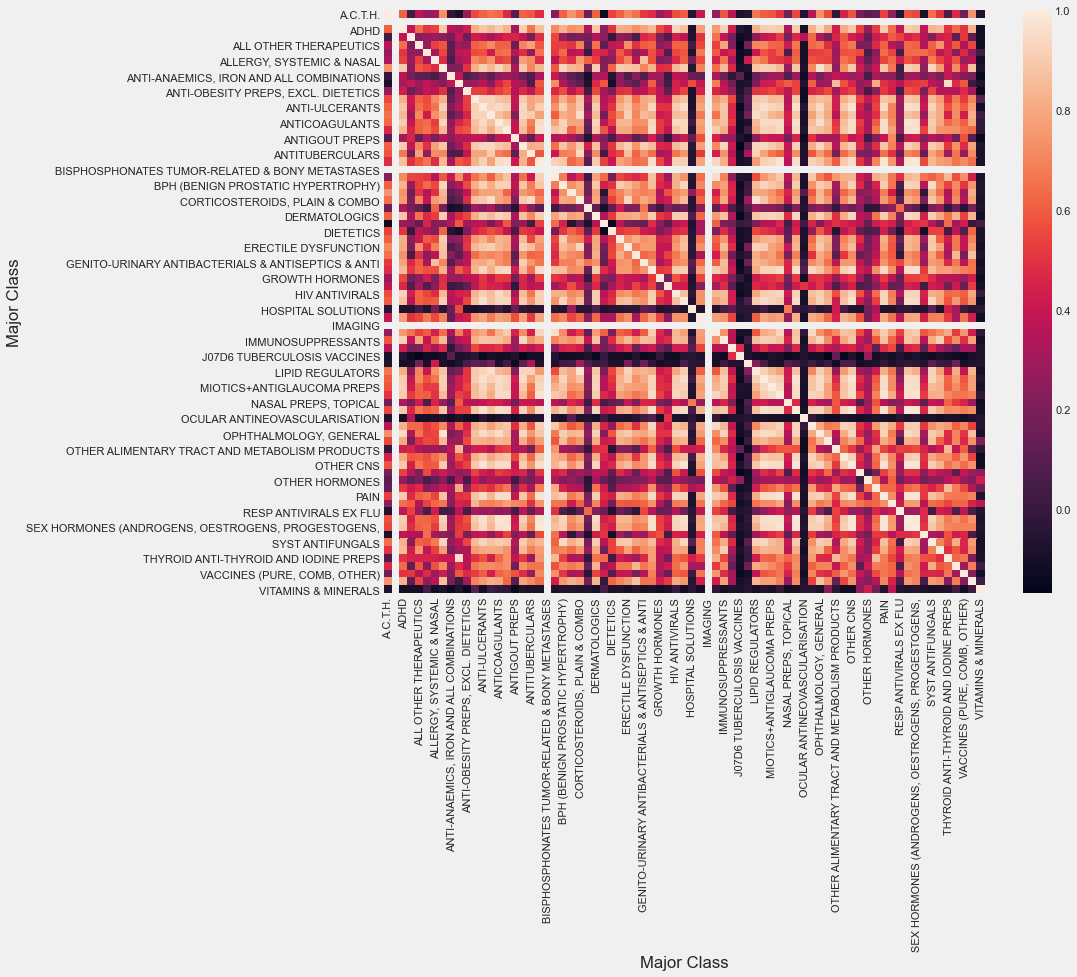

In [38]:
sns.heatmap(changed.corr(), annot=False)
plt.savefig('Price_chanced_correlations_Major_class.jpg', bbox_inches='tight', pad_inches=2)
plt.show()